In [256]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as sps
import statsmodels.api as sm
from collections import Counter
%matplotlib inline

#Mafia: a nerd's approach

--Adam Peterson, [repo](https://github.com/apeterson91/Mafia), [site](http://apeterson91.github.io)

[Mafia](https://en.wikipedia.org/wiki/Mafia_(party_game) is a great party game. If you haven't played it before, I highly encourage you to click on the link, find out more, and possibly suggest/direct a game at your next possible convenience. The game is also called Werewolves, and there are a wide variety of rules by which the game can be played (sometimes dependent upon the number of people involved), but the fundamentals are largely the same.

### Rules

The game revolves around two stages: Day and Night, and players are divided into two groups: townspeople and mafia . The assignment of townspeople and mafia, as well as the overall moderator of events and cycling of stages is conducted by a narrator.

<img src="https://m2.behance.net/rendition/pm/398169/disp/06d0a58dd7aca6c2c1e01c677d806bca.png">

### Here's how the story goes...

During the day, the townspeople, and mafia masquerading as townspeople, deliberate on whom they suspect as being guilty of mafia membership. They arrive at a decision - usually through some sort of haphhazard voting process - and subsequently kill a member of their own town. (FUN!) 

Then the night comes, at which point the narrator will 'awaken' the mafia members, who then silently pick a member of the townspeople to kill. The mafia "goes back to sleep" as directed by the narrator, and the cycle of lynching continues as the narrator informs the townspeople of their newly fallen companion, until the point is reached at which either the mafia are completely eliminated, or they are equal to/greater in number than the townspeople and thus able to overrun the town.

### Rationalism: it's not dramatic enough

I've played this game several times and each time I play, I've tried to employ some sort of rationally informed strategy to eliminate the mafia as quickly as possible. This has been an overwhelmingly unpopular stance to take, as I've been informed of several times. But seeing as this is the internet, and all opinions are welcome here, I thought I'd formalize my thoughts for a rational approach to playing the game (albeit a simplified version of the true game).

<img src="http://www.quickmeme.com/img/5a/5a2462f99146c7f91413369343b7cc1615d039821913abbf4d39aff4e1e19bbf.jpg">

## Its all about the voting trends

There is really only one$^{1}$ piece of evidence a townperson has to go on that is easily measurable: the voting patterns. This is *assuming* that the mafia will always avoid voting for their own teammate. Lets make some mathematical definitions to formalize this and to,you know, be cool.

$$
n = \text{ total number of residents in the town } \\
\text{ the set of all residents } = R = \{i : 1 \leq i \leq n  \} \\
\text{ the set of all mafiosos } = M = \{ i : 1 \leq i \leq n, i \notin T \} \\
\text{ the set of all townspeople } = T = \{ i : 1 \leq i \leq n , i \notin M \} \\
\text{ the set of dead people} = D = \{ i : 1 \leq i \leq n, i \notin R \} \\
|M| = \lfloor \frac{1}{5}n \rfloor, \hspace{ 3 mm }|T| = \lceil \frac{4}{5}n \rceil \\ 
|D| = 0 \text{ at the beginning of the game }
$$

These may or may not be valid assumptions depending upon the game you're playing, but one fifth is roughly the proportion of mafia I've seen played with so... let's just go with that for funsies. In fact, while we're at it, lets make some further assumptions.

$$
\text{ Townperson vote: }t _{i} \sim Uniform(R \hspace{1 mm } -  \hspace{ 1 mm}  D -t_{i}) \hspace{3 mm} \forall t_{i} \in T \\
\text{ Mafia vote:} m_{i} \sim Uniform( T \hspace{ 1 mm } -  \hspace { 1 mm } D - M) \hspace{ 3 mm} \forall m_{i} \in M
$$

Here we're basically suggesting that a townsperson will vote for any person (or vote for any number) provided they are not dead or themself, without giving preference to any one individual over another. Meanwhile, the Manfia will do the same, while additionally not voting for anyone in the mafia.

## Tricksy assumption

<img src="http://weknowmemes.com/generator/uploads/generated/g1362510228548807777.jpg">

Again, it is worth noting that these assumptions do not map perfectly to the real world. We all know that one person who will unceasingly attack you at the start of every mafia round, eager to remove you from the game and clearly exhibiting a bias of dickery. Its hard to model that kind of antagonism in a computer and maintain any sense of consistency.

Additionally, in my experience, mafia members have been known to be super mischevious and vote for their own members in the hope that they might remove suspicion of any possible allegiance between them and a possibly condemned individual. Alas, I have no patience to model such complexity, so we'll continue forward undeterred.

## SIMULATION

Now what is it exactly that we're going to be doing? Well we're going to run a little simulation of this game and look at the individual voting record for each person, and see if it conforms to a random uniform distribution.

We'll stick with a game of 15 people. Since the number of voting trials can get quite large as you increase the number of random votes - you have to do a lot of revoting to get a majority poll.

I won't get into the mechanics of how the simulation works here, but if you're familiar with Python and want to take a look, the file can be found [here](https://github.com/apeterson91/Mafia/blob/master/Mafia.py). Comments and suggestions welcome of course.

In [221]:
from Mafia import Town,Resident
np.random.seed(3) ## set seed for 'reproducibility' or something

In [222]:
n = 15
t = Town(n)
t.initiate_game()
votes = pd.DataFrame.from_dict(t.voting_log_)
votes.columns = [str(i) for i in range(1,n+1)]

### first things first

So the simulation has run, and now we have the complete voting log of the entire 'town'. Lets take a look at the distribution of a mafioso and a town person, to see if we can even tell the difference between the two when we have all the information feasible

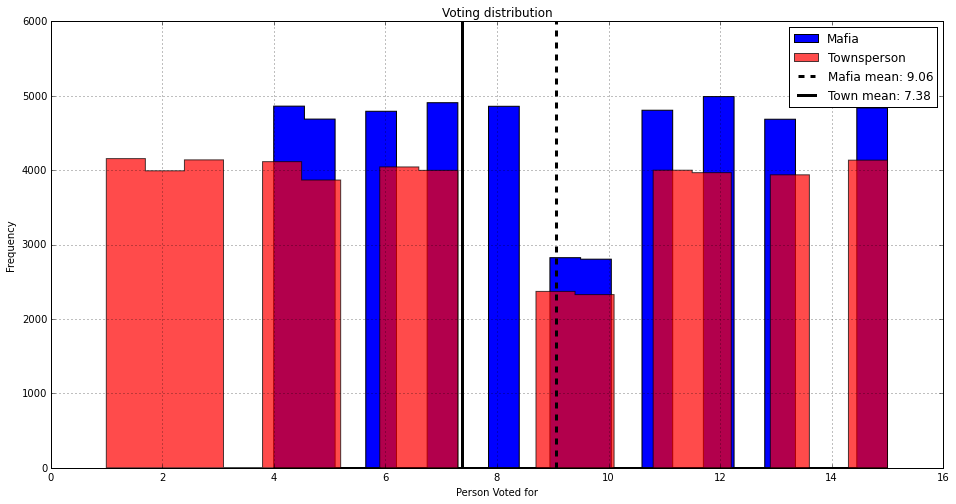

In [224]:
plt.figure(figsize=(16,8))
votes["1"].plot(kind='hist',bins=20,label="Mafia",histtype='stepfilled')
votes["8"].plot(kind='hist',bins=20,label="Townsperson",alpha=0.7,color='red',histtype='stepfilled')
mafia_mean = round(votes["1"].mean(),2)
town_mean = round(votes["8"].mean(),2)
plt.vlines([mafia_mean],0,6000,'black',linestyle='--', lw=3,label="Mafia mean: " + str(mafia_mean))
plt.vlines(town_mean,0,6000,'black',linestyle='-', lw=3,label="Town mean: " + str(town_mean))
plt.xlim([0,16])
plt.title("Voting distribution")
plt.xlabel("Person Voted for")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

### Well thats...obvious

Yeah, go figure. If you have the advantage of seeing someone vote *thousands* of times, then it becomes pretty obvious where their loyalties lie. The mafia bars don't even touch 1 or 2 (indices representing other mafia members) and, looking at the mean bars, the Mafia mean is ~2 points higher than the town person: thats a pretty clear difference.$^{3}$

So at least we know we can determine the difference between these folks at the **end** of the game. But lets say you'd want to figure this out while playing the game. You know, so you can win. Well determining that is a little tricky.

### Get a little personal... perspective



Now one way to approach this problem is to ask the question, "what is the probability that some particular person will vote for another particular person?" Or to put it in an example, if you're playing Mafia with Josh, James, Jon, Jesse and Jayme, what is the probability that Jesse votes for Jayme (It could be any two people, I just picked these two at random). If Jesse is voting according to a 'random uniform' distribution then the probability should be $\frac{1}{n}$ where n=4 is the number of persons eligible to be killed, exclusive of himself.

Interesting side note - while this technique is effective in simulations to determine if someone was the mafia, it could also be useful in determining if someone had a vendetta of a more 'personal nature', surfacing into the game.

## Bae or bayes ?

In order to answer this question, we're going to employ the Bayesian approach to statistics. This will allow us to combine our relative naivety at the start of the game, and update this as time goes on, to form a new probability distribution. 

This new distribution encapsulates the uncertainty of any estimate we'd like to make regarding the probability of a townsperson picking another townsperson, or a mafia picking another townsperson. I'll leave the formal mathematics to the truly interested, with a footnote to a reference below.$^{2}$

Graphing credit$^{4}$

Let's look at a mafioso first

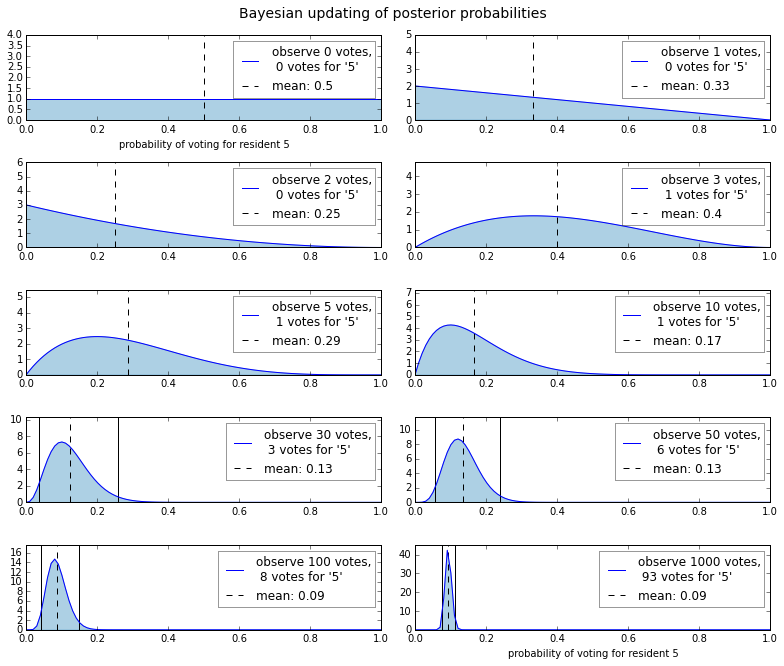

In [248]:
plt.figure(figsize=(11,9))
n_votes = [0,1,2,3,5,10,30,50,100,1000]
x = np.linspace(0,1,100)
dist = sps.beta

for k,n in enumerate(n_votes):
    ax = plt.subplot(len(n_votes)/2,2,k+1)
    plt.xlabel("probability of voting for resident 5") \
        if k in [0, len(n_votes) - 1] else None
    votes_for_five = (((votes["1"]==5)*1)[:n]).sum() ## calculate number of votes for resident number 5 (a townsperson)
    post = sps.beta(1+votes_for_five,1+n-votes_for_five)
    y = dist.pdf(x,1 + votes_for_five,1+n-votes_for_five)
    plt.plot(x, y, label="observe %d votes,\n %d votes for '5'" % (n, votes_for_five))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(post.mean(), 0, max(y)+3, color="k", linestyles="--", lw=1,label="mean: " +str(round(post.mean(),2)))
    plt.vlines(post.ppf([0.025,0.975]),0,max(y)+3,color="k", linestyles='-', lw=1) if k in [6,7,8,9] else None
    leg = plt.legend() 
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)
plt.tight_layout()

<img src="https://s-media-cache-ak0.pinimg.com/736x/2c/0a/a6/2c0aa63b2729d97ac5619a7e54bdb7b7.jpg">

Now lets overlay one of the graphs above with the data from one of the known townspeople to see if there really is a difference. One point to make before we go there, the solid black lines in some of the graphs above give the *95% credible interval* bounds, that is those lines contain 95% of the probability distribution, and thus the probability that the *true* probability lies within those bounds. This'll be an important point of distinction as we progress

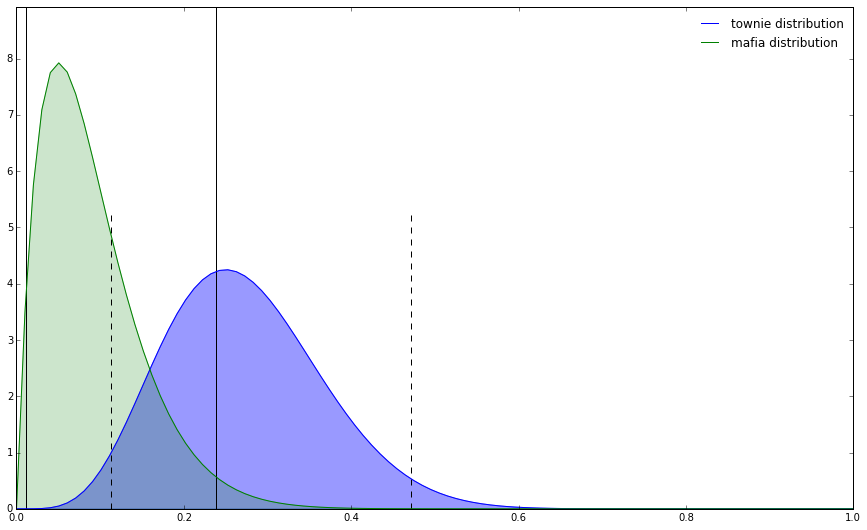

In [241]:
n = 30
plt.figure(figsize=(15,9))
dist = sps.beta

x = np.linspace(0,1,100)
town_votes = (((votes["6"]==5)*1)[:n]).sum()
mafia_votes = (((votes["1"]==5)*1)[:n]).sum()
y_t = dist.pdf(x,1+town_votes,1+n-town_votes)
y_m = dist.pdf(x,1+mafia_votes,1+n-mafia_votes)
t_post = sps.beta(1+town_votes,1+n-town_votes)
m_post = sps.beta(1+mafia_votes,1+n-mafia_votes)
plt.plot(x,y_t, color='blue', label="townie distribution")
plt.plot(x,y_m, color='green',label="mafia distribution")
plt.fill_between(x, 0, y_t, color="blue", alpha=0.4)
plt.fill_between(x,0,y_m, color='green', alpha=0.2)
plt.vlines(m_post.ppf([0.025,0.975]),0,max(y_m)+1,color='k',linestyle='-',lw=1)
plt.vlines(t_post.ppf([0.025,0.975]),0,max(y_t)+1,color='k',linestyle='--',lw=1)
leg = plt.legend(loc='best') 
leg.get_frame().set_alpha(0.0)
plt.autoscale(tight=True)
plt.show()

### Well Shucks

It looks like after thirty votes, we don't have a good ability to discriminate between the two distributions. In fact, if you're really paying attention, you'll notice that the townie distribution is further to the right than the mafia distribution. That doesn't make sense! If the mafioso truly is truly discriminating in favor of the mafia, then his probability of selecting a town member should be higher! What this really means is that $n=20$ isn't enough to really discriminate a mafia member on a one to one basis, you need to consider the pattern in terms of groups of people and further comparison.

For example, what about a mafia members voting for an town person vs. a mafia?

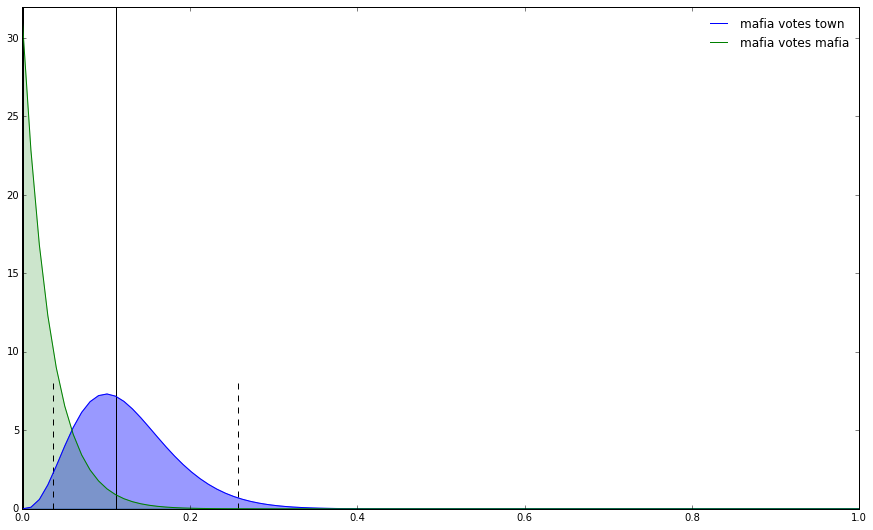

In [255]:
n = 30
plt.figure(figsize=(15,9))
dist = sps.beta

x = np.linspace(0,1,100)
mafia_votes_mafia = (((votes["1"]==2)*1)[:n]).sum()
mafia_votes_townie = (((votes["1"]==5)*1)[:n]).sum()
y_m = dist.pdf(x,1+mafia_votes_mafia,1+n-mafia_votes_mafia)
y_t = dist.pdf(x,1+mafia_votes_townie,1+n-mafia_votes_townie)
t_post = sps.beta(1+mafia_votes_townie,1+n-mafia_votes_townie)
m_post = sps.beta(1+mafia_votes_mafia,1+n-mafia_votes_mafia)
plt.plot(x,y_t, color='blue', label="mafia votes town")
plt.plot(x,y_m, color='green',label="mafia votes mafia")
plt.fill_between(x, 0, y_t, color="blue", alpha=0.4)
plt.fill_between(x,0,y_m, color='green', alpha=0.2)
plt.vlines(m_post.ppf([0.025,0.975]),0,max(y_m)+1,color='k',linestyle='-',lw=1)
plt.vlines(t_post.ppf([0.025,0.975]),0,max(y_t)+1,color='k',linestyle='--',lw=1)
leg = plt.legend() 
leg.get_frame().set_alpha(0.0)
plt.autoscale(tight=True)
plt.show()

### Still no luck... 

Well, here you can at least tell that the mafioso's probability of selecting another mafia is trending lower, than picking another random townie...what if you started looking at this as potential groups of people?

Suppose knew who the mafia were, and you looked at how often they voted for everyone else?

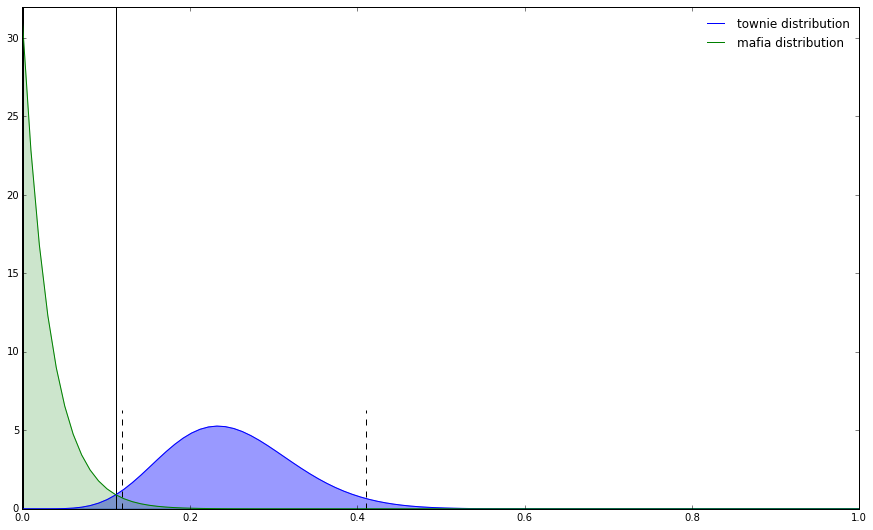

In [251]:
n = 30
plt.figure(figsize=(15,9))
dist = sps.beta

x = np.linspace(0,1,100)
town_votes = (((votes["6"]<3)*1)[:n]).sum()
mafia_votes = (((votes["1"]<3)*1)[:n]).sum()
y_t = dist.pdf(x,1+town_votes,1+n-town_votes)
y_m = dist.pdf(x,1+mafia_votes,1+n-mafia_votes)
t_post = sps.beta(1+town_votes,1+n-town_votes)
m_post = sps.beta(1+mafia_votes,1+n-mafia_votes)
plt.plot(x,y_t, color='blue', label="townie distribution")
plt.plot(x,y_m, color='green',label="mafia distribution")
plt.fill_between(x, 0, y_t, color="blue", alpha=0.4)
plt.fill_between(x,0,y_m, color='green', alpha=0.2)
plt.vlines(m_post.ppf([0.025,0.975]),0,max(y_m)+1,color='k',linestyle='-',lw=1)
plt.vlines(t_post.ppf([0.025,0.975]),0,max(y_t)+1,color='k',linestyle='--',lw=1)
leg = plt.legend(loc='best') 
leg.get_frame().set_alpha(0.0)
plt.autoscale(tight=True)
plt.show()

### Aha! 

Well there we have it, when using such a small number of voting sessions (30 out of thousands), you really have to try and identify the entire group of mafioso to have a "good" (good = 95%) chance of correctly selecting out a mafioso and his/her compatriots.
  
<br>
<br>  
  
   
...Well good. I'm glad we did this. Now we all know how to win mafia...right?

<br>
<br>

## A few notes

Adam, you must be thinking, how could I ever possibly keep track of all this data, survive long enough in this game to realize this probability *and* have enough time to look at all the possible groups of mafia$^{5}$? 

You can't, you couldn't, it'd be really hard. I didn't say this was feasible, I just said that I'd lay out a formal approach. If you want the actual mathematically proven 'best strategy' I suggest you look [here](http://arxiv.org/pdf/math/0609534v4.pdf) at some of the work done by these gentleman$^{6}$ who prove that random guessing is the 'optimal' approach to playing the game (given their assumptions, etc.).

Given the disutility of these results, it's almost as though entire ordeal was used as a simple exercise in simulation and data analysis for a budding young M.S. student...

## References:

    1: There are other things one could measure 'technically', but none as easily as the votes
    2: Gelman, et al. "Bayesian Data Analysis" Ch 2: Single Parameter Models lists the formal derivation for the estimation of a single parameter for a binomial distribution
    3: Okay, yes you'd need to do a two sample t-test to determine if its really different, but given the huge n,you can be pretty sure the standard error on those suckers is going to be miniscule.
    4: Davidson, et al[. "Probabablistic Programming for Hackers" Ch:1 (and the entire book) has amazing data visualizations
    5: 15 choose 3 = 455 possible groups of mafia 
    6: Braverman et al. "MAFIA: A THEORETICAL STUDY OF PLAYERS AND COALITIONS IN A PARTIAL INFORMATION ENVIRONMENT"


all photo links credited through the links in coded file available in above github repo
[Davidson link](http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb)